# spectra pca analysis

In [1]:
!pwd

/mnt/c/Users/elisabetta.venuti/OneDrive - Alma Mater Studiorum Università di Bologna/home


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
import os
import glob

In [4]:
from sklearn.decomposition import PCA as pca
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.cluster import KMeans

In [5]:
# get times with filenames

## read data

In [6]:
colnames=["freq","intensity"]

In [7]:
df=pd.read_csv("data/VK_IR_polvere/2021032401.asc",skiprows=25, sep="\t",names=colnames, header=None)



In [8]:
df.head()

,freq,intensity
0,4000.0,91.171192
1,3999.5,91.179839
2,3999.0,91.188673
3,3998.5,91.193141
4,3998.0,91.192708


In [9]:
path = '/home/betta/linux/data/VK_IR_polvere/' # use your path
all_files = glob.glob(os.path.join(path , "*.asc"))
print(len(all_files))
#all_files

22


In [10]:
i=1
for file in all_files:
    df1=pd.read_csv(file,skiprows=25, sep="\t",names=colnames, header=None)
    df[str(i)]=df1['intensity']
    #df=pd.concat([df,df1],axis=1)
    i=i+1
df = df.rename(columns={'intensity': '0'})    
#df=df.set_index("freq") 
df=df.drop('0',axis=1)

In [11]:
df.head()

,freq,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,4000.0,91.171192,91.501922,96.833827,94.212975,91.484900,92.658187,90.848467,92.642986,91.780181,...,95.084827,95.419132,95.006072,95.826906,96.372222,95.463583,96.938589,98.758440,97.786199,96.723675
1,3999.5,91.179839,91.500204,96.831587,94.221110,91.479327,92.653390,90.847231,92.643211,91.783691,...,95.083212,95.418576,95.008185,95.833890,96.375075,95.461998,96.941286,98.763317,97.779469,96.722704
2,3999.0,91.188673,91.498473,96.834173,94.231802,91.473187,92.649773,90.844380,92.642397,91.783187,...,95.079212,95.415979,95.009670,95.841449,96.375212,95.462663,96.945043,98.767953,97.775505,96.717943
3,3998.5,91.193141,91.503432,96.839425,94.238570,91.469999,92.651545,90.845068,92.641206,91.780334,...,95.075158,95.413957,95.007661,95.845462,96.375169,95.464533,96.949026,98.771633,97.775576,96.715722
4,3998.0,91.192708,91.510631,96.844010,94.239607,91.472066,92.656956,90.849120,92.641445,91.777148,...,95.072522,95.415102,95.004508,95.846741,96.376571,95.467533,96.952225,98.774692,97.778958,96.716757


In [12]:
df.shape

(7201, 23)

## Filter the dataframe

In [13]:
left=3500
right=3900

In [14]:
df_filtered=df[(df["freq"]>left) & (df["freq"] < right)]
df_filtered.head()

,freq,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
201,3899.5,91.142445,91.541001,96.810518,94.240256,91.472701,92.671845,90.792834,92.602035,91.742658,...,94.996572,95.449253,95.023659,95.827906,96.363172,95.473751,96.952730,98.771523,97.727350,96.669992
202,3899.0,91.184969,91.568132,96.816966,94.276544,91.499989,92.696793,90.843877,92.610810,91.759302,...,95.019708,95.455454,95.048985,95.851614,96.376475,95.500876,96.970850,98.773367,97.749263,96.697318
203,3898.5,91.181698,91.565706,96.807042,94.285869,91.503311,92.704823,90.831618,92.614131,91.755736,...,95.002168,95.450197,95.059676,95.860138,96.381367,95.512623,96.970202,98.763317,97.755417,96.702568
204,3898.0,91.161480,91.548883,96.800225,94.261387,91.491476,92.698792,90.800618,92.618113,91.748079,...,94.984870,95.439229,95.056886,95.860938,96.385155,95.512578,96.961565,98.753039,97.755515,96.698114
205,3897.5,91.149788,91.537846,96.806299,94.228548,91.480582,92.689740,90.788547,92.628943,91.746365,...,94.987165,95.431385,95.048992,95.858742,96.388952,95.506597,96.955130,98.749789,97.754813,96.694748


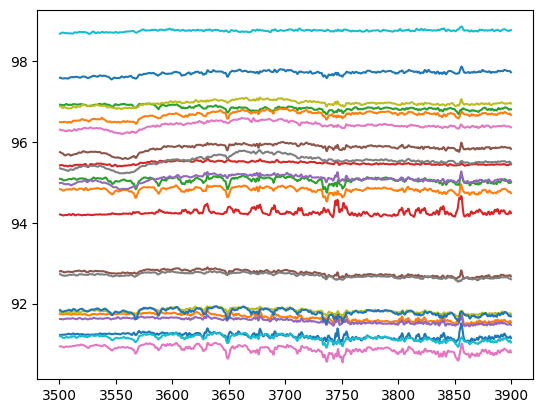

In [15]:
for col in df.columns[1:]:
    plt.plot(df_filtered["freq"],df_filtered[str(col)])

In [16]:
df_filtered.head()

,freq,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
201,3899.5,91.142445,91.541001,96.810518,94.240256,91.472701,92.671845,90.792834,92.602035,91.742658,...,94.996572,95.449253,95.023659,95.827906,96.363172,95.473751,96.952730,98.771523,97.727350,96.669992
202,3899.0,91.184969,91.568132,96.816966,94.276544,91.499989,92.696793,90.843877,92.610810,91.759302,...,95.019708,95.455454,95.048985,95.851614,96.376475,95.500876,96.970850,98.773367,97.749263,96.697318
203,3898.5,91.181698,91.565706,96.807042,94.285869,91.503311,92.704823,90.831618,92.614131,91.755736,...,95.002168,95.450197,95.059676,95.860138,96.381367,95.512623,96.970202,98.763317,97.755417,96.702568
204,3898.0,91.161480,91.548883,96.800225,94.261387,91.491476,92.698792,90.800618,92.618113,91.748079,...,94.984870,95.439229,95.056886,95.860938,96.385155,95.512578,96.961565,98.753039,97.755515,96.698114
205,3897.5,91.149788,91.537846,96.806299,94.228548,91.480582,92.689740,90.788547,92.628943,91.746365,...,94.987165,95.431385,95.048992,95.858742,96.388952,95.506597,96.955130,98.749789,97.754813,96.694748


In [17]:
df2=df_filtered.T
df2=df2.iloc[1:]

In [18]:
df2.head()

,201,202,203,204,205,206,207,208,209,210,...,990,991,992,993,994,995,996,997,998,999
1,91.142445,91.184969,91.181698,91.161480,91.149788,91.150875,91.157538,91.163858,91.173079,91.194529,...,91.228951,91.227267,91.226360,91.227401,91.228685,91.227561,91.224021,91.220615,91.219331,91.220447
2,91.541001,91.568132,91.565706,91.548883,91.537846,91.536255,91.541719,91.549472,91.554576,91.559552,...,91.741538,91.736240,91.730291,91.727362,91.730566,91.739485,91.749354,91.753352,91.747448,91.734826
3,96.810518,96.816966,96.807042,96.800225,96.806299,96.821280,96.835732,96.845147,96.851343,96.855945,...,96.923471,96.915830,96.912628,96.912119,96.912187,96.913410,96.917051,96.921727,96.924140,96.923239
4,94.240256,94.276544,94.285869,94.261387,94.228548,94.211780,94.212808,94.217581,94.219167,94.224908,...,94.191997,94.187187,94.181936,94.180314,94.183415,94.188409,94.192511,94.196203,94.201279,94.206714
5,91.472701,91.499989,91.503311,91.491476,91.480582,91.477634,91.480392,91.483202,91.484386,91.488271,...,91.621244,91.617258,91.612083,91.608495,91.608411,91.611193,91.614762,91.617590,91.618852,91.617703


In [19]:
df2.tail()
df2.shape

(22, 799)

In [20]:
time_col=[5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200,250,280,310]
len(time_col)
df2.insert(loc=0,column="Time",value=time_col)

In [21]:
df2.head()

,Time,201,202,203,204,205,206,207,208,209,...,990,991,992,993,994,995,996,997,998,999
1,5,91.142445,91.184969,91.181698,91.161480,91.149788,91.150875,91.157538,91.163858,91.173079,...,91.228951,91.227267,91.226360,91.227401,91.228685,91.227561,91.224021,91.220615,91.219331,91.220447
2,10,91.541001,91.568132,91.565706,91.548883,91.537846,91.536255,91.541719,91.549472,91.554576,...,91.741538,91.736240,91.730291,91.727362,91.730566,91.739485,91.749354,91.753352,91.747448,91.734826
3,15,96.810518,96.816966,96.807042,96.800225,96.806299,96.821280,96.835732,96.845147,96.851343,...,96.923471,96.915830,96.912628,96.912119,96.912187,96.913410,96.917051,96.921727,96.924140,96.923239
4,20,94.240256,94.276544,94.285869,94.261387,94.228548,94.211780,94.212808,94.217581,94.219167,...,94.191997,94.187187,94.181936,94.180314,94.183415,94.188409,94.192511,94.196203,94.201279,94.206714
5,25,91.472701,91.499989,91.503311,91.491476,91.480582,91.477634,91.480392,91.483202,91.484386,...,91.621244,91.617258,91.612083,91.608495,91.608411,91.611193,91.614762,91.617590,91.618852,91.617703


## PCA analysis

In [22]:
from scipy.signal import savgol_filter

### convert to asorbance

In [23]:
#feat = np.log(1.0/(df2.values[:,2:]).astype('float32'))
feat = np.log(10000.0/(df2.values[:,1:]).astype('float32'))
#feat= df2.values[:,1:]

In [24]:
feat

array([[4.6979165, 4.69745  , 4.697486 , ..., 4.6970596, 4.6970735,
        4.6970615],
       [4.6935534, 4.693257 , 4.6932836, ..., 4.6912365, 4.691301 ,
        4.691438 ],
       [4.6375847, 4.637518 , 4.6376204, ..., 4.6364365, 4.6364117,
        4.636421 ],
       ...,
       [4.6175313, 4.617512 , 4.6176143, ..., 4.618258 , 4.6183424,
        4.61842  ],
       [4.628159 , 4.627935 , 4.627872 , ..., 4.62962  , 4.629558 ,
        4.629547 ],
       [4.639037 , 4.638755 , 4.6387005, ..., 4.6409035, 4.640905 ,
        4.640876 ]], dtype=float32)

In [25]:
# Calculate first derivative applying a Savitzky-Golay filter
dfeat = savgol_filter(feat, 25, polyorder = 5, deriv=1)

In [26]:
#pca = PCA(n_components=2)

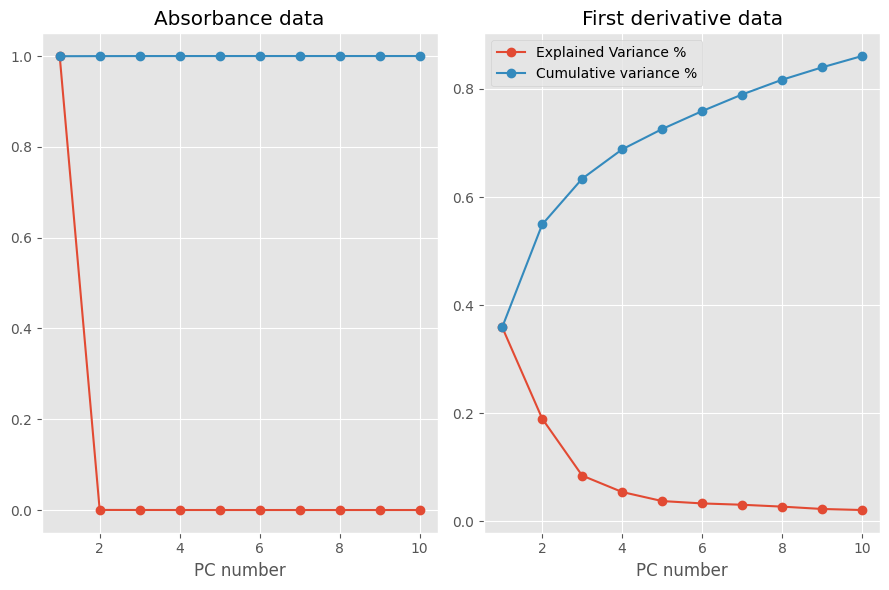

In [27]:
# Initialise
nc = 10
pca1 = pca(n_components=nc)
pca2 = pca(n_components=nc)
 
# Scale the features to have zero mean and standard devisation of 1
# This is important when correlating data with very different variances
nfeat1 = StandardScaler().fit_transform(feat)
nfeat2 = StandardScaler().fit_transform(dfeat)


#nfeat1=feat
#nfeat2=dfeat
# Fit the spectral data and extract the explained variance ratio
X1 = pca1.fit(nfeat1)
expl_var_1 = X1.explained_variance_ratio_
 
# Fit the first data and extract the explained variance ratio
X2 = pca2.fit(nfeat2)
expl_var_2 = X2.explained_variance_ratio_
 
# Plot data
pc_array = np.linspace(1,nc,nc)
with plt.style.context(('ggplot')):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9,6))
    fig.set_tight_layout(True)
 
    ax1.plot(pc_array, expl_var_1,'-o', label="Explained Variance %")
    ax1.plot(pc_array, np.cumsum(expl_var_1),'-o', label = 'Cumulative variance %')
    ax1.set_xlabel("PC number")
    ax1.set_title('Absorbance data')
 
    ax2.plot(pc_array, expl_var_2,'-o', label="Explained Variance %")
    ax2.plot(pc_array, np.cumsum(expl_var_2),'-o', label = 'Cumulative variance %')
    ax2.set_xlabel("PC number")
    ax2.set_title('First derivative data')
 
    plt.legend()
    plt.show()

In [28]:
nfeat1.shape

(22, 799)

In [29]:
pca1=pca(n_components=4)
pca2=pca(n_components=4)
x1=pca1.fit_transform(nfeat1)
x2=pca2.fit_transform(nfeat2)

In [30]:
x1

array([[-3.71688652e+01, -1.32289857e-01,  2.99503952e-01,
         2.43146315e-01],
       [-3.15459690e+01, -3.24702352e-01,  4.03152317e-01,
        -2.36790821e-01],
       [ 3.00019703e+01, -9.83453095e-01, -1.82723626e-01,
        -1.61704019e-01],
       [-3.46423894e-01, -7.55687384e-03,  8.40177834e-01,
         3.59261662e-01],
       [-3.25965004e+01, -1.85698122e-01,  2.81440645e-01,
        -8.14890116e-02],
       [-1.83035049e+01, -1.30679607e-01,  3.81806940e-02,
        -2.81951159e-01],
       [-4.12894783e+01, -1.61502823e-01, -4.03905451e-01,
         1.14635453e-01],
       [-1.89913063e+01, -3.31801213e-02, -1.74139589e-02,
        -2.32141331e-01],
       [-2.96620865e+01,  2.64060438e-01, -2.99212318e-02,
         3.72309275e-02],
       [-3.78582916e+01,  1.15405507e-01, -2.62686521e-01,
         5.42339310e-02],
       [-3.00018864e+01, -2.61940677e-02, -4.35092419e-01,
         8.84200782e-02],
       [ 6.27600622e+00, -2.18605191e-01, -3.26255828e-01,
      

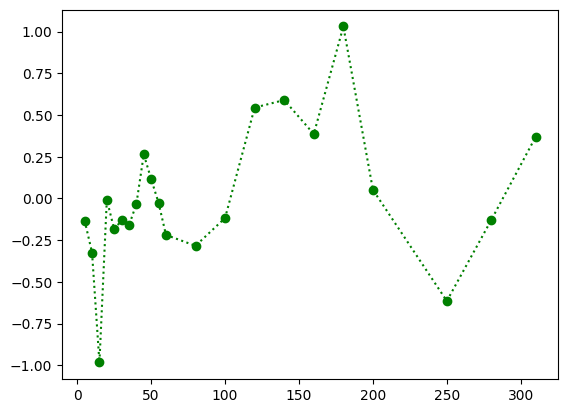

In [31]:

#plt.plot(time_col,Xt1[:,0]+400,'o:r')
plt.plot(time_col,x1[:,1],'o:g')
#plt.plot(time_col,Xt2[:,2],'o:b')
#plt.plot(time_col,Xt2[:,3],'o:y')
plt.show()

In [32]:
pca = pca(n_components=4)
df_pca = pca.fit_transform(nfeat1)
df_pca = pd.DataFrame(df_pca)

In [33]:
df_pca

,0,1,2,3
0,-37.168865,-0.132292,0.299502,0.243148
1,-31.545969,-0.324703,0.403153,-0.236790
2,30.001970,-0.983453,-0.182724,-0.161702
3,-0.346424,-0.007556,0.840176,0.359265
4,-32.596497,-0.185699,0.281440,-0.081492
5,-18.303505,-0.130679,0.038183,-0.281953
6,-41.289474,-0.161498,-0.403906,0.114633
7,-18.991306,-0.033180,-0.017413,-0.232142
8,-29.662088,0.264060,-0.029923,0.037230
9,-37.858292,0.115407,-0.262687,0.054232


In [34]:
df_pca_loadings = pd.DataFrame(pca.components_)
df_pca_loadings.head()

,0,1,2,3,4,5,6,7,8,9,...,789,790,791,792,793,794,795,796,797,798
0,-0.035383,-0.035382,-0.035382,-0.035382,-0.035383,-0.035383,-0.035383,-0.035383,-0.035382,-0.035381,...,-0.035370,-0.035371,-0.035372,-0.035373,-0.035373,-0.035373,-0.035372,-0.035372,-0.035373,-0.035374
1,-0.000373,-0.002871,-0.007944,-0.011339,-0.010686,-0.007058,-0.003360,-0.001470,-0.001073,-0.000816,...,0.067111,0.064511,0.062173,0.060361,0.059389,0.059382,0.059674,0.059152,0.057192,0.054321
2,-0.010505,-0.010119,-0.014958,-0.012499,-0.002739,0.008427,0.015957,0.020152,0.023903,0.026102,...,0.008459,0.007237,0.007073,0.007242,0.007259,0.007719,0.009445,0.012364,0.015298,0.017273
3,-0.032224,-0.046281,-0.043866,-0.034874,-0.028606,-0.029778,-0.035787,-0.041688,-0.047672,-0.056738,...,0.018652,0.021964,0.025218,0.026465,0.026377,0.027224,0.029531,0.031001,0.029387,0.025720


In [35]:
pca.components_

array([[-0.03538322, -0.03538236, -0.03538209, ..., -0.03537216,
        -0.03537266, -0.03537356],
       [-0.00037301, -0.00287121, -0.00794435, ...,  0.05915173,
         0.0571915 ,  0.05432123],
       [-0.01050498, -0.01011857, -0.014958  , ...,  0.01236398,
         0.01529843,  0.01727312],
       [-0.03222378, -0.04628124, -0.04386576, ...,  0.03100096,
         0.02938745,  0.02572034]], dtype=float32)


# Import data from csv on github
#url = 'https://raw.githubusercontent.com/nevernervous78/nirpyresearch/master/data/milk.csv'
#data = pd.read_csv(url)
 
# The first column of the Data Frame contains the labels
#lab = data.values[:,1].astype('uint8') 
 
# Read the features (scans) and transform data from reflectance to absorbance
#feat = np.log(1.0/(data.values[:,2:]).astype('float32'))
 
# Calculate first derivative applying a Savitzky-Golay filter
#dfeat = savgol_filter(feat, 25, polyorder = 5, deriv=1)

In [36]:
#data.head()

In [37]:
#unique = list(set(lab))
#colors = [plt.cm.jet(float(i)/max(unique)) for i in unique]
with plt.style.context(('ggplot')):
    plt.figure(figsize=(8,6))
    for i, u in enumerate(unique):
        col = np.expand_dims(np.array(colors[i]), axis=0)
        xi = [Xt2[j,0] for j in range(len(Xt2[:,0])) if lab[j] == u]
        yi = [Xt2[j,1] for j in range(len(Xt2[:,1])) if lab[j] == u]
        plt.scatter(xi, yi, c=col, s=60, edgecolors='k',label=str(u))
 
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(labplot,loc='upper right')
    plt.title('Principal Component Analysis')
    plt.show()

NameError: name 'unique' is not defined

<Figure size 800x600 with 0 Axes>